# DXdao Reverse Bonds

An exploration of the mechanism of reverse Bonds and other DXD monetary policy initiatives.

## DXD Monetary Policy Framework

### DXD Floor Price Guarantee 
**DXdao commits to buying any amount of DXD on the open market**

- DXD Floor Price Guarantee priced at 70% of the current DXD-NAV Ratio (DXD’s circulating market cap to Treasury NAV)
- Must have clear indication of what is included in NAV.
- This price becomes a reference of schelling point for the DXD token and should stabilize around this level based on the expectation that one can always sell at this price. 
    - Large holders may discount this as they will still suffer from slippage since there is no direct redemption. 
    - Speculation on growth of the treasury via income or appreciation could lead to a premium over the 70%.
    - If DXD can be minted for ETH or Stablecoins at 100% of NAV then there should never be a premium over 100% except during short, irrational periods.
- The premium above 70% NAV will be directly impacted by the means with which DXD holders can realize gains at a higher rate in the future. Inverse Bonds will impact this.
    - Large redemption events at 70% increase the book value of all remaining unredeemed DXD, but the liquid price of DXD is still 70% of that number.
    - 70% of a higher book value is still higher than before, but rational investors should not accept a 100% book value in their calcs unless it is redeemable at that rate.

#### Runway risks

Promising a price for DXD adds attack area. While this can be mitigated in many ways, it is worth thinking about the dynamics at play.

- In an imaginary, slippage free world, if all DXD in circulation could be bought back at once, 30% of the treasury left over to fund development. 
- In the real world, this is not possible and large sales would push the price down below 70%, meaning that more than 30% would be left over.
- As DXD is purchased by the DAO, the DXD/NAV ratio changes and the price per DXD at 70% increases. *Would be interesting to model how this plays out*
- 30% is roughly $8.5 million at current prices. This should provide multiple years of runway.
**The most important mechanism here is that redemption is not at 100%, leaving those who continue to hold their tokens with the benefit of that discount.**  

### Inverse bonds
**Smart contracts where DXD can be deposited for a defined period of time in return for a certain % of DXdao treasury assets**

Proposed Implementation from DAOtalk:
- $500k in DXD inverse bonds with 85% payout after 6 months will be issued, along with
- $500k in DXD inverse bonds with 90% of NAV payout after one year, and
- $1m in DXD Inverse bonds with 100% NAV payout after two years

Inverse bonds are an interesting way to give DXD holders an opportunity to get a better deal on selling their DXD by waiting for a set period of time. But they change how the seller interacts with the DAO and the market. The floor price already commits to buying at 70% of NAV, with DXD holders interacting with the market and not directly with the DXdao treasury. Inverse bonds have a different relationship in that they allow direct redemption of treasury assets. This begs 2 questions:

- Is one of these mechanisms preferable? (direct vs indirect redemptions)
- Is there a good reason to use both and not pick 1 of the 2 for both methods?

**What happens with direct redemptions at 70%?**
Direct redemptions move the arbitrage opportunity between the market price and redemption rate to market participants. For example, if the market price for DXD is below 70% of NAV, then market participants would buy DXD up until the point at which redemption stops being profitable. This could be considered as a value leak from the DXdao treasury to the market since in the indirect approach, DXdao should benefit from the delta between the market price and 70% of NAV. Depending on how the DAO buys DXD, this process could still be front-run by market participants to leech value. 

**What happens with direct redemptions via inverse bonds?**
When considering inverse bonds, we must now consider the time aspect to the bonds when looking at the market conditions. The first assumption I will make is that the Price of DXD at the time of bonding will be 70% of NAV. Given the schedule from DAOtalk listed above we get the following rates of return (denominated in % of NAV):

- 21.4% over 6 months (`(0.85 - 0.7)/.7)`) or 43% annually if repeated each period.
- 28.4% over 12 months (`(0.9 - 0.7)/.7)`).
- 43 % over 24 months (`(1 - 0.7)/.7)`) or 21.4% annually.

The first thing we see is that bonding over 6 months has by far the best return (43% vs 28.4% vs 21.4%). This relationship is backwards from what one would expect with an inverse bonding model. locking for longer should pay out a higher rate than locking for a shorter time.

Lets look at what different rate curves can be fit to the data:
First is a linear regression:

Text(15, 0.85, 'y = 0.75 + 0.01 * x')

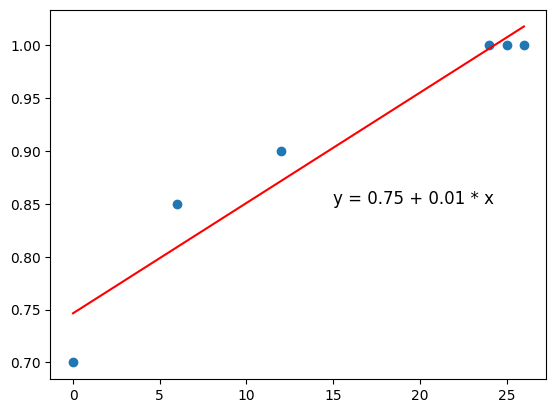

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Update the sample data
x = [0, 6, 12, 24, 25, 26]
y = [0.7, 0.85, 0.9, 1, 1, 1]

# Fit a logarithmic curve to the data
slope, intercept = np.polyfit(x, y, 1)

# Create a sequence of evenly-spaced values that covers the range of the x data points
x_values = np.linspace(min(x), max(x))

# Plot the data using matplotlib
plt.scatter(x, y)
plt.plot(x_values, intercept + slope * x_values, 'r')

# Add a label showing the equation of the regression line
equation = f'y = {intercept:.2f} + {slope:.2f} * x'
plt.annotate(equation, (15, 0.85), fontsize=12)


This doesn't fit very well. Lets try a quadratic curve:

Text(15, 0.85, '            2\n-0.0004374 x + 0.02258 x + 0.7083')

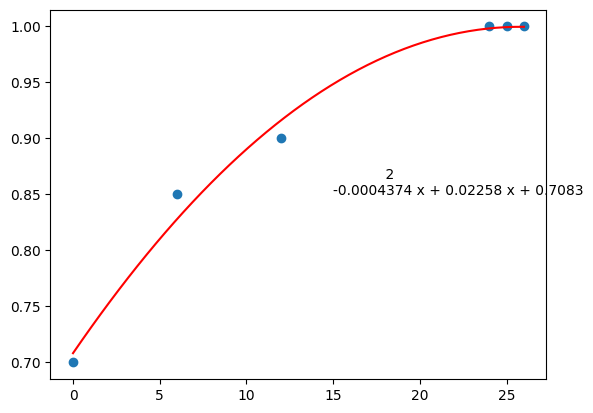

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Update the sample data
x = [0, 6, 12, 24, 25, 26]
y = [0.7, 0.85, 0.9, 1, 1, 1]

# Fit a logarithmic curve to the data
coefficients = np.polyfit(x, y, 2)

# Create a polynomial object from the coefficients
poly = np.poly1d(coefficients)

# Use the polynomial object to compute the equation of the line
equation = poly

# Create a sequence of evenly-spaced values that covers the range of the x data points
x_values = np.linspace(min(x), max(x))

# Evaluate the polynomial at the x values and plot the curve
plt.scatter(x, y)
plt.plot(x_values, poly(x_values), 'r')

# Add a label showing the equation of the regression line
# plt.annotate(equation, (15, 0.85), fontsize=10)


This isn't bad if we are ok with a sharp kink upward from 70%. It still benefits shorter term bonders since the slope is greatest for the beginning of the bonding duration. I think we can do better

Text(15, 0.85, '           3            2\n2.732e-05 x - 0.001431 x + 0.03053 x + 0.7028')

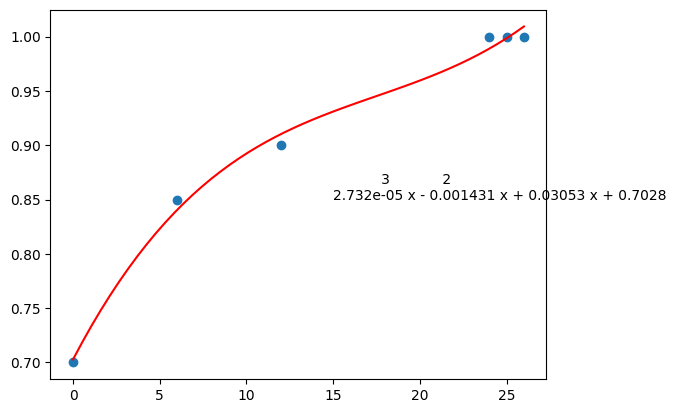

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Update the sample data
x = [0, 6, 12, 24, 25, 26]
y = [0.7, 0.85, 0.9, 1, 1, 1]

# Fit a logarithmic curve to the data
coefficients = np.polyfit(x, y, 3)

# Create a polynomial object from the coefficients
poly = np.poly1d(coefficients)
# Use the polynomial object to compute the equation of the line
equation = poly

# Create a sequence of evenly-spaced values that covers the range of the x data points
x_values = np.linspace(min(x), max(x))

# Evaluate the polynomial at the x values and plot the curve
plt.scatter(x, y)
plt.plot(x_values, poly(x_values), 'r')
# Add a label showing the equation of the regression line
# plt.annotate(equation, (15, 0.85), fontsize=10)


Text(15, 0.85, ' \n0.1377 1 / (1 + e^(-x)) + 0.8461')

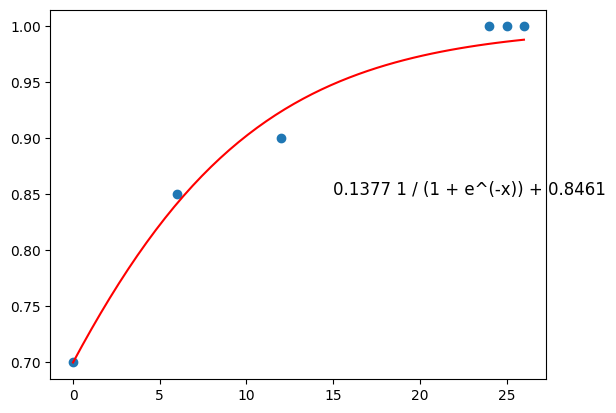

In [58]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.special import expit

# Update the sample data
x = [0, 6, 12, 24, 25, 26]
y = [0.7, 0.85, 0.9, 1, 1, 1]

# Define a function that computes the values of the sigmoid curve for a given set of coefficients


def sigmoid(x, a, b):
    return expit(a * x + b)


# Use curve_fit to find the coefficients that best fit the data
coefficients, _ = curve_fit(sigmoid, x, y)
a, b = coefficients

# Create a polynomial object from the coefficients
poly = np.poly1d([a, b])

# Use the polynomial object to compute the equation of the sigmoid curve
equation = poly.__str__().replace('x', '1 / (1 + e^(-x))')

# Create a sequence of evenly-spaced values that covers the range of the x data points
x_values = np.linspace(min(x), max(x))

# Evaluate the sigmoid curve at the x values and plot the curve
plt.scatter(x, y)
plt.plot(x_values, sigmoid(x_values, a, b), 'r')

# Add a label showing the equation of the sigmoid curve
# plt.annotate(equation, (15, 0.85), fontsize=12)


Better, but we want the curve to have minimal slope as x=0 and x=24 

y at x = 0: 0.7009897232038964
y at x = 1mo: 0.7037077371030672
y at x = 6mo: 0.736101664868972
y at x = 12mo: 0.8468708334241721
y at x = 18mo: 0.9617335574744789
y at x = 24mo: 0.9999607266349549
y at x = 12mo no interp: 0.8345470785033721
6mo returns: 10.3% per year
12mo returns: 21.0% per year
18mo returns: 24.9% per year
24mo returns: 21.4% per year


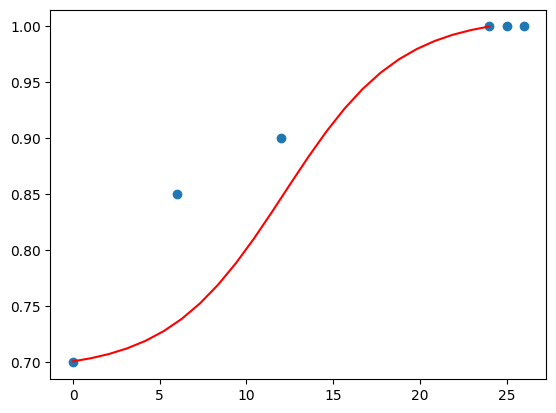

In [72]:
import numpy as np
import matplotlib.pyplot as plt
duration_in_years = 2
timeframe = 12 * (duration_in_years / 2)

# Update the sample data
x_data = [0, 6, 12, 24, 25, 26]
y_data = [0.7, 0.85, 0.9, 1, 1, 1]

# Define the range of the x-axis
x = np.linspace(-1 * timeframe, timeframe * 1, int(timeframe * 2))

# Calculate the output values for each input using the sigmoid curve
y = 0.3 / (.95 + np.exp(-.3 * x)) + (0.7 * 0.99)

# Shift the curve horizontally by adding a constant value to the x-coordinates
x_shifted = x + timeframe

# Plot the shifted curve
plt.scatter(x_data, y_data)
plt.plot(x_shifted, y, 'r')

# Find the value of y at x = 0
# TODO: make function
y_at_x_0 = np.interp(0, x_shifted, y)
y_at_x_1mo = np.interp(1, x_shifted, y)
y_at_x_6mo = np.interp(6, x_shifted, y)
y_at_x_12mo = np.interp(12, x_shifted, y)
y_at_x_18mo = np.interp(18, x_shifted, y)
y_at_x_24mo = np.interp(24, x_shifted, y)
y_at_x_12mo_no_interp = y[11]

# Print the result
print(f'y at x = 0: {y_at_x_0}')
print(f'y at x = 1mo: {y_at_x_1mo}')
print(f'y at x = 6mo: {y_at_x_6mo}')
print(f'y at x = 12mo: {y_at_x_12mo}')
print(f'y at x = 18mo: {y_at_x_18mo}')
print(f'y at x = 24mo: {y_at_x_24mo}')
print(f'y at x = 12mo no interp: {y_at_x_12mo_no_interp}')

# returns
# TODO: include value function 
def calcReturns(perc_of_NAV):
    return((perc_of_NAV - 0.7)/0.7)

print(f'6mo returns: {(calcReturns(y_at_x_6mo)*2):.1%} per year')
print(f'12mo returns: {calcReturns(y_at_x_12mo):.1%} per year')
print(f'18mo returns: {(calcReturns(y_at_x_18mo)*2/3):.1%} per year')
print(f'24mo returns: {(calcReturns(y_at_x_24mo)/2):.1%} per year')


This works! We get a curve that starts at 70% and then increases slowly, reaches its fastest growth at 50% and slows down to the full payoff at the end of the time period.

This curve has a few nice properties:
- short duration locks offer minimal advantage over simply not locking.
- There is a section near the middle of the curve where the slope is maximized, meaning growth of the bond is maximized. 
- The duration of the bond could be tweaked so that the 3/4 point on the x axis is targeted as the desired bonding time (most of the value has been delivered), with diminishing returns for longer bonds. In the above plot, at 18 months, the inverse bond would pay out 96% of NAV.
- You can see the returns/year printed above for different durations held.

y at x = 0: 0.7009897232038964
y at x = 6mo: 0.7181113177568452
y at x = 12mo: 0.763398298390218
y at x = 18mo: 0.8468568360728898
y at x = 24mo: 0.9326297916814904
y at x = 30mo: 0.9812033245605024
y at x = 36mo: 0.9999607266349549
12mo bond returns: 9.1% per year
24mo bond returns: 16.6% per year
36mo bond returns: 14.3% per year


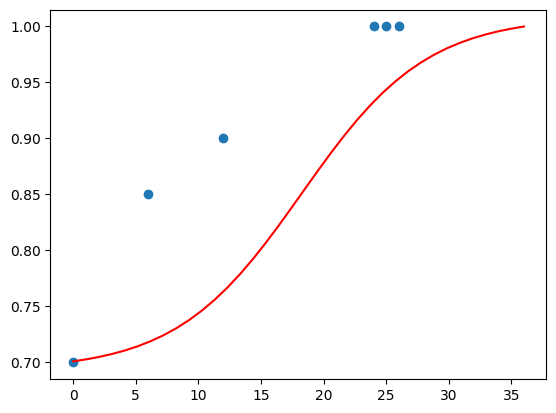

In [86]:
import numpy as np
import matplotlib.pyplot as plt
duration_in_years = 3
timeframe = 12 * (duration_in_years / 2)

# Update the sample data
x_data = [0, 6, 12, 24, 25, 26]
y_data = [0.7, 0.85, 0.9, 1, 1, 1]

# Define the range of the x-axis
x = np.linspace(-1 * timeframe, timeframe * 1, int(timeframe * 2))

# Calculate the output values for each input using the sigmoid curve
y = 0.3 / (.95 + np.exp(-.2 * x)) + (0.7 * 0.99)

# Shift the curve horizontally by adding a constant value to the x-coordinates
x_shifted = x + timeframe

# Plot the shifted curve
plt.scatter(x_data, y_data)
plt.plot(x_shifted, y, 'r')

# Find the value of y at x = 0
y_at_x_0 = np.interp(0, x_shifted, y)
y_at_x_6mo = np.interp(6, x_shifted, y)
y_at_x_12mo = np.interp(12, x_shifted, y)
y_at_x_18mo = np.interp(18, x_shifted, y)
y_at_x_24mo = np.interp(24, x_shifted, y)
y_at_x_30mo = np.interp(30, x_shifted, y)
y_at_x_36mo = np.interp(36, x_shifted, y)
y_at_x_48mo = np.interp(48, x_shifted, y)

# Print the result
print(f'y at x = 0: {y_at_x_0}')
print(f'y at x = 6mo: {y_at_x_6mo}')
print(f'y at x = 12mo: {y_at_x_12mo}')
print(f'y at x = 18mo: {y_at_x_18mo}')
print(f'y at x = 24mo: {y_at_x_24mo}')
print(f'y at x = 30mo: {y_at_x_30mo}')
print(f'y at x = 36mo: {y_at_x_36mo}')

# returns
# TODO: include value function
def calcReturns(perc_of_NAV):
    return ((perc_of_NAV - 0.7)/0.7)

print(f'12mo bond returns: {(calcReturns(y_at_x_12mo)):.1%} per year')
print(f'24mo bond returns: {(calcReturns(y_at_x_24mo)/2):.1%} per year')
print(f'36mo bond returns: {(calcReturns(y_at_x_36mo)/3):.1%} per year')



Above is 36 month duration bond curve. After the 1st year it pays out at 76% of NAV. After the second year it pays 93% of NAV, and is at 99% when it hits the 3rd year. The last year has limited returns for the bonder, but it would still provide a benefit to the treasury for most bonders to take the 2 year option and re-bond since they are still selling under NAV.

## Indirect Redemptions for Inverse Bonds

It is still worth asking whether it makes sense for the DAO to directly disperse treasury assets via bonding. Instead of giving the assets directly, the curve above could be use to determine how much the bond pays in DXD. In the above example, after 1 year it would pay out a 9.4% bonus on the locked DXD. After the second year it would be a 33.2% bonus, and after the 3rd year it would be a 42.9% bonus. This would be paid in DXD which could then be sold on the open market (expected to be at 70% of NAV) or re-bonded to compound the benefits.

Again using the above curve, if Alice bonded 100 DXD for 2 years, she would get 133.2 DXD at the end of the second year. If she wanted to exit at this point, she could sell via Mesa or CowSwap and get roughly `133.2 * 0.70` or 93 DXD worth of other assets from the open market.

This greatly simplifies the role of the DXdao monetary policy committee and governance. They continue to manage the floor price guarantee by selling treasury assets for DXD but do not have to deal with the complexity of managing how bonds are redeemed and bonds deal only with DXD as an asset. 